# Titanic Disaster

In this reboot, we will explore the famous [Titanic](https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Titanic_dataset.csv) dataset listing all passengers with various properties.

❓ Start loading `matplotlib`, `numpy` and `pandas` the usual way

In [4]:
import pandas as pd
import numpy as np
import matplotlib


❓ Run `!ls -lh` to list files in the current folder. You should see a `.csv` file.

In [6]:
!ls -lh

total 140K
-rw-r--r-- 1 miranda miranda  60K Oct 21 20:10 ML_Titanic_dataset.csv
-rw-r--r-- 1 miranda miranda  174 Oct 21 20:10 ML_Titanic_dataset.csv:Zone.Identifier
-rw-r--r-- 1 miranda miranda 2.4K Oct  3 19:17 README.md
-rw-r--r-- 1 miranda miranda 9.4K Oct 21 20:15 Recap.ipynb
-rw-r--r-- 1 miranda miranda  60K Oct 21 20:12 titanic.csv


In [35]:
!https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Titanic_dataset.csv > titanic.csv

zsh:1: no such file or directory: https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Titanic_dataset.csv


In [36]:
titanic_df = pd.read_csv("ML_Titanic_dataset.csv")
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


❓ Explore the dataset with the usual methods (`shape`, `dtypes`, `describe()`, `info()`, `isnull().sum()`).

Do not hesitate to add cells by pressing `B`.

In [10]:
titanic_df.shape

(891, 12)

In [12]:
titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [13]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [15]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

It seems that the `Cabin` information is missing in 687 rows. Pretty normal considering people in 3rd class (`Pclass`) did not have one!

❓ Use the [`pandas.DataFrame.drop`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html) function to get rid of the `Cabin` in `titanic_df`

In [38]:
titanic_df.drop('Cabin', axis = 'columns', inplace = True)
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

## Classes Analysis

Let's have a look at the ticket divide.

❓ Using a `groupby()`, create a `pclass_df` dataframe counting the number of tickets sold per class (1, 2 or 3)

In [45]:
pclass_df = titanic_df.groupby('Pclass')[['Ticket']].count().rename(columns=['Ticket','Count'])
pclass_df

TypeError: 'list' object is not callable

Looking at the number is not very visual, let's try to make sense of the data with a plot.

❓ Plot the `pclass_df` dataframe built in the previous question as a barchart

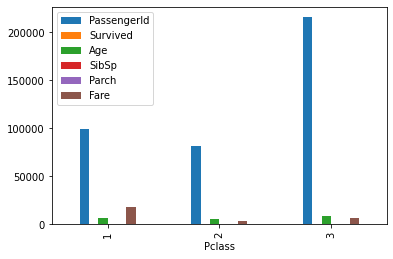

In [40]:
plot = pclass_df.plot(kind='bar');


Let's now have a look at **survivors**.

❓ Plot a barchart of *frequency of survivals* per class. `0` means no one survived in the class, `1` means everyone survived.

<AxesSubplot:xlabel='Pclass'>

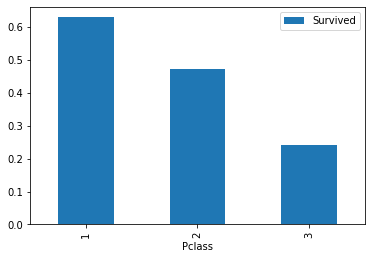

In [43]:
survived_df = titanic_df.groupby('Pclass')[['Survived']].mean()
plot = survived_df.plot(kind='bar')
plot

### Gender Analysis

Let's have a look at the `Sex` column.

❓ Use the [`pandas.Series.unique`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.unique.html) function to check the different values used in that column

In [50]:
titanic_df.groupby('Sex')[['Survived']].mean()


,Survived
Sex,
female,0.742038
male,0.188908


❓ Plot a barchart of survival frequency of each gender. Who survived the most?

In [34]:
most_df = titanic_df("Survived").unique([sex])
plot = most_df.plot(kind='bar')
plot

TypeError: 'DataFrame' object is not callable

Let's build a fancier histogram where we show the total number of passengers + the total number of survivors (for each gender).

❓ Build a `survivors_df` DataFrame with two columns: `Total` and `Survived`, and two rows (`male` and `female`). Plot it.

In [51]:
survivors_df = titanic_df.groupby("Sex").agg({'PassengerId': 'count','Survived':'sum'})
Survivors_df.columns = ['Total','Survived']
survivors_df

NameError: name 'Survivors_df' is not defined

## Children

The former analysis did not take into account ages. We want to differentiate between a child and an adult and see how survival rates are affected.

❓ Use boolean indexing to create a `children_df` containing only rows of child passengers

In [55]:
titanic_df.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [60]:
children_df = titanic_df[titanic_df['Age'] <18]

In [57]:
children_df['Age'].value_counts()

16.00    17
17.00    13
2.00     10
4.00     10
9.00      8
1.00      7
3.00      6
14.00     6
15.00     5
11.00     4
5.00      4
8.00      4
6.00      3
7.00      3
10.00     2
0.75      2
13.00     2
0.83      2
0.92      1
12.00     1
14.50     1
0.67      1
0.42      1
Name: Age, dtype: int64

❓ How many children were there in the Titanic?

In [63]:
children_df.shape

(113, 11)

❓ How many children survived?

In [62]:
children_df.Survived.sum()

61

❓ Plot a barchart of survivors / total for each category: `male`, `female`, `children`. Bear in mind that you need to **substract** the boys from the `male` statistics, and the girls from the `female` statistics.

In [64]:
survivors_df.shape

(2, 2)

In [ ]:
children_group =  children_df.groupby('Sex').agg({'PassengerId': 'count','Survived':'sum'}).rename(columns={})
children_group.head()

In [65]:
survivors_df.head()

,PassengerId,Survived
Sex,,
female,314,233
male,577,109


In [68]:
adults = survivors_df - children_group
adults

NameError: name 'children_group' is not defined

## Big families

❓ Find out if it was harder for bigger families to survive?
  
Here you create a new column in your `DataFrame` for the family size of the passenger.

In [0]:
# YOUR CODE HERE

## Distinguished titles

❓ Were passengers with distinguished titles preferred during the evacuation?
   
With some string manipulation, create a new column for each user with their title

In [0]:
# YOUR CODE HERE